<img src="https://drive.google.com/uc?export=view&id=1AQr9H9bXDeNPchTRufU78g8z0yxHvrmC" width="100%">

# **Taller 2**
---

En este taller se evaluarán las habilidades adquiridas en expresiones regulares, manejo de la librería `spacy` y preprocesamiento a partir del conjunto de datos [Balanced_AHR](https://www.kaggle.com/datasets/chizhikchi/andalusian-hotels-reviews-unbalanced) de Kaggle.

En este caso, usted deberá realizar algunas operaciones de búsqueda de textos con expresiones regulares y normalización de textos. Comenzamos importando las librerías necesarias:

In [ ]:
#TEST_CELL
!pip install unidecode

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from IPython.display import display
plt.style.use("ggplot")

Cargamos el conjunto de datos:

In [ ]:
!wget https://raw.githubusercontent.com/mindlab-unal/mlds4-case-study/refs/heads/main/dataset/Balanced_AHR.csv

--2025-03-23 22:44:34--  https://raw.githubusercontent.com/mindlab-unal/mlds4-case-study/refs/heads/main/dataset/Balanced_AHR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4559782 (4.3M) [text/plain]
Saving to: ‘Balanced_AHR.csv.1’

Balanced_AHR.csv.1  100%[===================>]   4.35M  --.-KB/s    in 0.09s   

2025-03-23 22:44:34 (50.2 MB/s) - ‘Balanced_AHR.csv.1’ saved [4559782/4559782]



In [ ]:
#TEST_CELL
df = pd.read_csv("Balanced_AHR.csv")
display(df.head())

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,IMPOSIBLE DESCANSAR,2,El fin de semana mi pareja y yo hicimos una re...,Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,0
1,1,No es oro todo lo que reluce,3,"El hotel en general está bien, las habtiacione...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
2,2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
3,3,SIN CALEFACCIÓN OPERATIVA Y CON FRÍO,2,Calefacción averiada o no operativa. Se coment...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0
4,4,Deja bastante que desear.,2,Este hotel ha bajado notoriamente su categoria...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0


Este conjunto de datos contiene 6 columnas:

- `title`: el título de la reseña.
- `rating`: la calificación que el usuario otorga a los alojamientos en una escala de 5 estrellas.
- `review_text`: el texto de la reseña.
- `location`: el reconocimiento a la ciudad y la región del hotel.
- `hotel`: el título del hotel.
- `label`: la etiqueta para la clasificación binaria. NOTA: Todas las reseñas neutrales (calificación de 3*) se etiquetan con un «3» y deben eliminarse para realizar la clasificación binaria.

Este corpus está conformado por `7615` reseñas.

In [ ]:
#TEST_CELL
display(df.shape)

(7615, 7)

## **1. Reconocimiento de Patrones en el Texto de las Reseñas**
---

En este punto, deberá extraer patrones específicos del texto de las reseñas de hoteles respecto a servicios que estos tienen.

Por ejemplo, la siguiente reseña:

"El hotel tiene una piscina estupenda y el desayuno es excelente."

Contiene los siguientes elementos:

- Mención de servicio: `piscina`
- Mención de servicio: `desayuno`

Para esto, debe implementar la función `extract_patterns` la cual deberá aplicar un patrón de expresión regular el cual pueda ser utilizado para identificar los servicios que se ofrecen.

- Piscina
- Desayuno
- Almuerzo
- Cena
- Wi-fi
- Gimnasio
- Lavandería
- Sauna

Tenga en cuenta que las palabras pueden tener mayúsculas, tildes y guiones,

**Parámetros**

Esta función no tiene parámetros.

**Retorna**

- `pat`: Expresión regular que ayuda a identificar los servicios.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que los grupos nombrados dentro de expresiones regulares en _Python_ se definen siguiendo la notación `(?P<tag>regex)` donde `tag` es el nombre del grupo y `regex` es la expresión regular que describe el grupo.
- Se recomienda usar cuantificadores como `+` para detectar secuencias de longitud mayor a 1 en los identificadores de cada grupo.
- Se recomienda revisar el identificador `\w`, ya que las URL normalmente usan caracteres alfanuméricos para representar algunas partes.
</details>

In [ ]:
# FUNCIÓN CALIFICADA extract_patterns:

def extract_patterns():
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    regex = ""
    pat = re.compile(regex)
    return pat
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
pat = extract_patterns()
matches = df['review_text'].str.findall(pat)
display(matches[1])

['piscina', 'piscina', 'wifi']

**Salida esperada**:

```python
❱ display(matches[1])
['piscina', 'piscina', 'wifi']
```

In [ ]:
#TEST_CELL
pat = extract_patterns()
matches = df['review_text'].str.findall(pat)
display(matches[4712])

['piscina', 'Wi-Fi', 'piscina']

**Salida esperada**:

```python
❱ display(matches[4712])
['piscina', 'Wi-Fi', 'piscina']
```

In [ ]:
#TEST_CELL
pat = extract_patterns()
matches = df['review_text'].str.findall(pat)
display(matches[1066])

['lavanderia']

**Salida esperada**:

```python
❱ display(matches[1066])
['lavanderia']
```

In [ ]:
#TEST_CELL
pat = extract_patterns()
matches = df['review_text'].str.findall(pat)
display(matches[3197])

['desayuno', 'desayuno', 'lavandería']

**Salida esperada**:

```python
❱ display(matches[3197])
['desayuno', 'desayuno', 'lavandería']
```

## **2. Selección de Categorías con Patrón**
---

En este punto deberá seleccionar todos los registros del _DataFrame_ donde la columna `hotel` corresponda con determinado patrón de entrada.

Para esto debe implementar la función `filter_hotel`, la cual recibirá el conjunto de datos y una expresión regular sobre la que debe filtrar.

**Parámetros**

- `df`: conjunto de datos en formato `pd.DataFrame`.
- `pat`: expresión regular sobre la que se debe filtrar.

**Retorna**

- `filtered_df`: `DataFrame` resultante del filtro por patrón de búsqueda.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que las `Series` de `pandas` contienen el método `str.contains`, este método le permitirá aplicar una expresión regular directamente.
- Puede usar el método `apply` de `pandas` para validar elemento a elemento si hay un match de la expresión regular.
</details>

In [ ]:
# FUNCIÓN CALIFICADA filter_type:

def filter_hotel(df, pat):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    filtered_df = pd.DataFrame({})
    return filtered_df
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
pat = re.compile(r"^[A].*$")
filtered_df = filter_hotel(df, pat)
display(filtered_df.hotel.value_counts())

,count
hotel,
Apartamentos_Torre_de_la_Plata,32
Apartamentos_Murillo,31
Alcoba_del_Rey_de_Sevilla_Boutique_Hotel,30
Abades_Nevada_Palace,30
Ayre_Hotel_Sevilla,25
...,...
Apartamentos_Cordoba_Atrium,2
Apartamentos_Vacacionales_Real_de_Cartuja,1
Ab_Apartamentos_Museum,1


**Salida esperada**

Este caso de prueba debería extraer todos los casos donde `hotel` comienza por una `"A"` mayúscula y luego tiene cualquier secuencia de letras.

```python
❱ display(filtered_df.Type.value_counts())

```
|hotel|count|
---|---|
|Apartamentos_Torre_de_la_Plata|	32|
|Apartamentos_Murillo|	31|
|Alcoba_del_Rey_de_Sevilla_Boutique_Hotel|	30|
|Abades_Nevada_Palace	|30|
|Ayre_Hotel_Sevilla|	25|
|...	|...|
|Apartamentos_Cordoba_Atrium|	2|
|Apartamentos_Vacacionales_Real_de_Cartuja|	1|
|Ab_Apartamentos_Museum	|1|
|Apartamentos_Alhambra	|1|
|Arte_Vida_Suites_Spa	|1|

62 rows × 1 columns



dtype: int64

In [ ]:
#TEST_CELL
pat = re.compile(r"^.*on$")
filtered_df = filter_hotel(df, pat)
display(filtered_df.hotel.value_counts())

,count
hotel,
Hotel_Casa_de_Colon,29
Pension_Cristobal_Colon,16
Hotel_Boston,13
Hotel_Simon,12
Hostal_Estacion,9
Hotel_Palacio_De_Santa_Paula_Autograph_Collection,5
B_B_Hotel_Granada_Estacion,4
Ohtels_San_Anton,4


**Salida esperada**

Este caso de prueba debería extraer todos los casos donde `hotel` termine por la secuencia `"on"`.

```python
❱ display(filtered_df.Type.value_counts())
```

|hotel | count	|
|----|----|
|Hotel_Casa_de_Colon|	29|
|Pension_Cristobal_Colon	|16|
|Hotel_Boston	|13|
|Hotel_Simon|	12|
|Hostal_Estacion	|9|
|Hotel_Palacio_De_Santa_Paula_Autograph_Collection|	5|
|B_B_Hotel_Granada_Estacion|	4|
|Ohtels_San_Anton|	4|




## **3. Documentos de spaCy**
---

En este punto, deberá convertir el corpus de reseñas en una lista de documentos de spaCy. Para ello, debe implementar la función `to_spacy` para extraer el texto de la columna `review_text` del DataFrame dado y convertirlo a objetos tipo `Doc` usando un pipeline dado.

**Parámetros**

- `df`: conjunto de datos.
- `nlp`: _pipeline_ de `spacy`.

**Retorna**

- `corpus`: lista de documentos de `spacy`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Puede usar el método `pipe` para pasar una lista de textos a un _pipeline_ y convertir masivamente varios resultados a `Doc` de `spacy`. Tenga en cuenta que debe convertir el resultado a una lista de _Python_.
- Puede usar el objeto `nlp` como una función para convertir un texto individual a un `Doc`, de esta forma, debe iterar sobre todo el corpus.
</details>

In [ ]:
# FUNCIÓN CALIFICADA to_spacy:

def to_spacy(df, nlp):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    corpus = []
    return corpus
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
import spacy
spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#TEST_CELL
corpus = to_spacy(df.head(20), nlp)
display(type(corpus))
display(type(corpus[0]))

list

spacy.tokens.doc.Doc

**Salida esperada**

Este caso de prueba debe convertir los primeros 20 documentos del corpus a objetos de `spacy`.

```python
❱ display(type(corpus))
list

❱ display(type(corpus[0]))
spacy.tokens.doc.Doc
```

## **4. Recuento de Stop Words**
---

En este punto, deberá implementar una función que permita contar el número de _stopwords_ por cada documento (de `spacy`). Para ello, debe implementar la función `stopword_count` para obtener los conteos de _stopwords_ a partir de una lista de documentos de `spacy`.

**Parámetros**
---

- `corpus`: lista de documentos de `spacy`.

**Retorna**

- `counts`: lista de conteos de _stopwords_ por documento.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que cada `Token` en `spacy` contiene el atributo `is_stop` que determina si el elemento es una _stopword_.
- Puede recorrer todos los tokens de un documento de `spacy` al iterar sobre el mismo, y sumar los valores de `token.is_stop`.
</details>

In [ ]:
# FUNCIÓN CALIFICADA stopword_count:

def stopword_count(corpus):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    counts = []
    return counts
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
nlp = spacy.load(
        "es_core_news_sm",
        exclude=[
            "ner", "tok2vec", "senter", "morphologizer",
            "parser", "attribute_ruler", "lemmatizer"]
        )
corpus = to_spacy(df, nlp)
counts = stopword_count(corpus)
display(counts[:10])

[96, 52, 26, 21, 25, 29, 79, 80, 41, 48]

**Salida esperada**

Este caso de prueba debe obtener los conteos de _stopwords_ para los primeros 10 documentos del corpus.

```python
❱ display(counts[:10])
[96, 52, 26, 21, 25, 29, 79, 80, 41, 48]
```

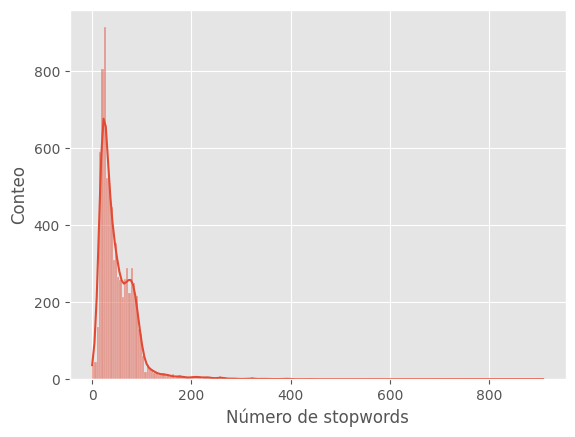

In [ ]:
#TEST_CELL
fig, ax = plt.subplots()
sns.histplot(counts, kde=True, ax=ax)
ax.set_xlabel("Número de stopwords")
ax.set_ylabel("Conteo")
fig.show()

**Salida esperada**

Este caso de prueba debe generar un histograma de la distribución de stopwords en todos los documentos.

## **5. Extracción de Palabras por etiquetas POS**
---

En este punto, deberá implementar una función que permita extraer las palabras de un texto que tengan etiquetas de tipo POS de grano grueso dentro de una lista de posibles valores.

Para ello deberá implementar la función `get_pos_words` la cual recibe una lista de documentos de `spacy` y debe retornar una lista de strings con las palabras filtradas y concatenadas por cada documento.

**Parámetros**
---

- `corpus`: lista de documentos de `spacy`.
- `pos_list`: lista de etiquetas POS a filtrar.

**Retorna**

- `filtered_pos`: lista strings con el filtro por etiquetas POS.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que puede acceder a una etiqueta de tipo _POS_ con el atributo `pos_` de un `Token` de `spacy`.
- Es importante que el resultado por cada documento sea un string y no una lista de tokens de `spacy`, puede usar el método `join` de los strings en _Python_ y el atributo `text` de los tokens de `spacy`.
</details>

In [ ]:
# FUNCIÓN CALIFICADA get_pos_words:
def get_pos_words(corpus, pos_list):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    filtered_pos = []
    return filtered_pos
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(2), nlp)
filtered_pos = get_pos_words(corpus, ["VERB"])
display(filtered_pos[1])

'tiene llegaba cortaba ocurre poner'

**Salida esperada**

Este caso de prueba debe extraer todos los verbos del segundo texto

```python
❱ display(filtered_pos[1])
'tiene llegaba cortaba ocurre poner'
```

In [ ]:
#TEST_CELL
filtered_pos = get_pos_words(corpus, ["VERB", "NOUN"])
display(filtered_pos[0])

'fin semana pareja hicimos reserva hotel fin descansar desconectar noche llevaron ala hotel dijeron descansar parte pareció buscábamos sorpresa mañana ruidos suponemos tacones habitación tiene culpa hotel limpiadoras moviendo muebles arrastrando sofás cogido alojamiento descansar pensando tener madrugar IMPOSIBLE ruidos destacar'

**Salida esperada**

Este caso de prueba debe extraer todos los verbos y sustantivos del primer documento

```python
❱ display(filtered_pos[0])
'fin semana pareja hicimos reserva hotel fin descansar desconectar noche llevaron ala hotel dijeron descansar parte pareció buscábamos sorpresa mañana ruidos suponemos tacones habitación tiene culpa hotel limpiadoras moviendo muebles arrastrando sofás cogido alojamiento descansar pensando tener madrugar IMPOSIBLE ruidos destacar'
```

## **6. Preprocesamiento**
---

En este punto usted deberá implementar un flujo de preprocesamiento para textos. Las tareas que debe realizar son las siguientes:

1. Filtrar stopwords.
2. Seleccionar únicamente palabras en algunas categorías de tipo _POS_
3. Normalizar el texto con `unidecode`.
4. Convertir a minúsculas.

Para ello debe implementar la función `preprocess` la cual recibirá un documento de `spacy` y la lista de etiquetas _POS_ para filtrar, con esto deberá retornar un string con el resultado del preprocesamiento.

**Parámetros**
---

- `doc`: documento de `spacy`.
- `pos_list`: lista de etiquetas POS a filtrar.

**Retorna**

- `preprocess_text`: texto preprocesado.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde filtrar stopwords con el atributo `is_stop` y filtrar etiquetas _POS_ con el atributo `pos_` de los tokens de `spacy`.
- Con la librería `unidecode` puede normalizar el texto.
- Puede convertir los textos en minúsculas con el atributo `lower` de un string.
</details>

In [ ]:
# FUNCIÓN CALIFICADA preprocess:
def preprocess(doc, pos_list):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    preprocess_text = ""
    return preprocess_text
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(10), nlp)
preprocess_text = preprocess(corpus[0], ["VERB", "NOUN"])
display(preprocess_text)

'semana pareja hicimos reserva hotel descansar desconectar noche llevaron ala hotel descansar parecio buscabamos sorpresa manana ruidos suponemos tacones habitacion culpa hotel limpiadoras moviendo muebles arrastrando sofas cogido alojamiento descansar pensando madrugar imposible ruidos destacar'

**Salida esperada**

Este caso de prueba muestra el primer documento preprocesado.

```python
❱ display(preprocess_text)
'semana pareja hicimos reserva hotel descansar desconectar noche llevaron ala hotel descansar parecio buscabamos sorpresa manana ruidos suponemos tacones habitacion culpa hotel limpiadoras moviendo muebles arrastrando sofas cogido alojamiento descansar pensando madrugar imposible ruidos destacar'
```

In [ ]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(10), nlp)
preprocess_text = preprocess(corpus[1], ["NOUN", "PROPN"])
display(preprocess_text)

'hotel general habtiaciones espaciosas personal encargado roof-top piscina zona piscina fallos wifi habitacion fallo cosa edredon sabana agosto sevilla'

**Salida esperada**

Este caso de prueba muestra el segundo documento preprocesado.

```python
❱ display(preprocess_text)
'hotel general habtiaciones espaciosas personal encargado roof-top piscina zona piscina fallos wifi habitacion fallo cosa edredon sabana agosto sevilla'
```

**¡Felicitaciones!** Ha terminado la tarea de la Unidad 2. ¡Excelente trabajo!
## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Ingrese a Moodle.
3. Realice el envío del *notebook* que descargó en la tarea (o quiz) correspondiente.
4. Recuerde que si tiene algún error, puede hacer múltiples intentos de envío en UNCode.


## Créditos
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*